# Avacado Project
###  Problem Statement:

##### Avocado is a fruit consumed by people heavily in the United States. 

##### Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

##### We make a model that can consider the data provided and predict the Average Price.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score,KFold,RepeatedKFold
from sklearn.preprocessing import MinMaxScaler
import joblib
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('avacado.csv') #loading the data set

In [4]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
df.shape

(1517, 14)

### data contain a Unnamed:0 Variable which can be removed at this is a index/S.No in csv data.

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

#### Delete Unnamed:0 index from csv file

In [7]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   int64  
 12  region        1517 non-null   object 
dtypes: float64(9), int64(1), object(3)
memory usage: 154.2+ KB


#### We can see that  Date , type and region are object(string ) type variable, all other variable showing a numerice, but year also a string variable which we will replace with value 0,1,2,3. 

#### Date field showing as object, we will convert it to DataTime format, and further we will split date field into day and month column, year is already given hance we will not collect year field from date feature.

In [9]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


#### We have added two extra feture(Month and Day) derived from Date feature, now we can Drop Data feature.

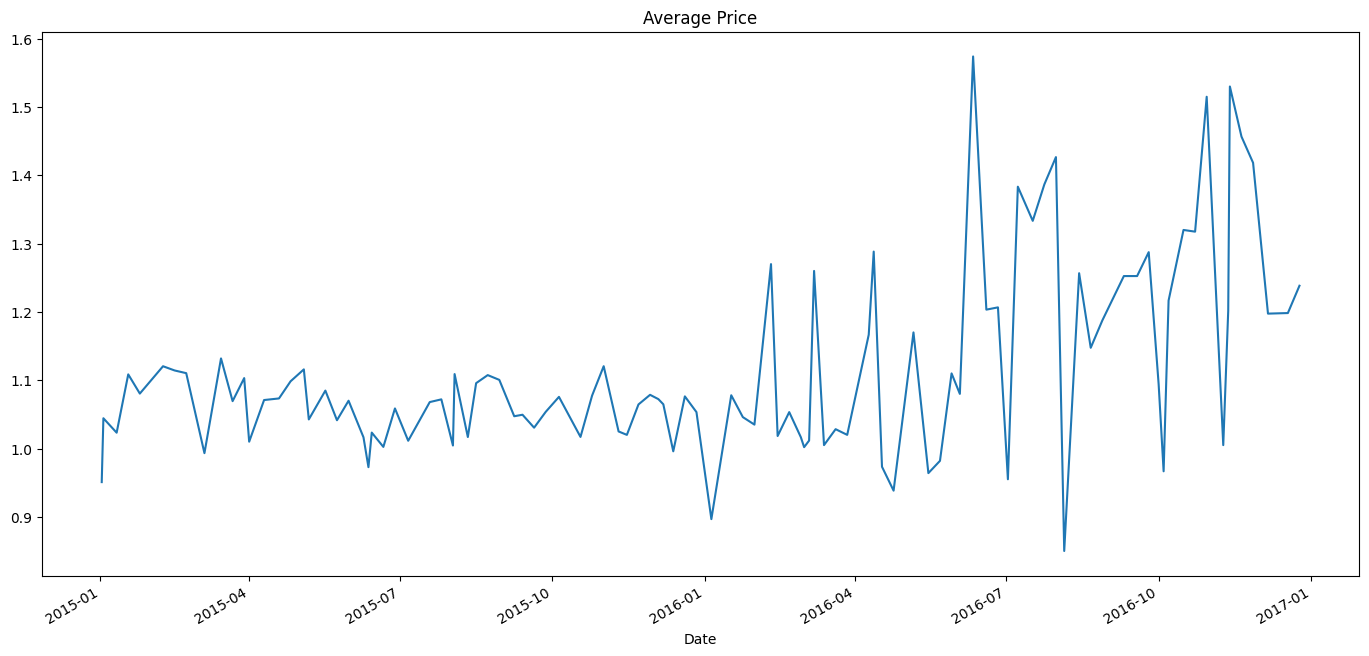

In [10]:
byDate=df.groupby('Date').mean()
plt.figure(figsize=(17,8),dpi=100)
byDate['AveragePrice'].plot()
plt.title('Average Price')
plt.show()

### Observation:- 

1. Date wise price show that price of Avacode started increasing around March 2016 , before this it was around 1.1.
2. We can see highest surge in price is also in 2026, where maximum price was all time high in June Month.
3. All time low price was also observed in 2016 when price reached to lowest level for some time, but this down fall remain for sometime and price again increased second highest value soon.

Text(0.5, 1.0, 'Average Price Per Month')

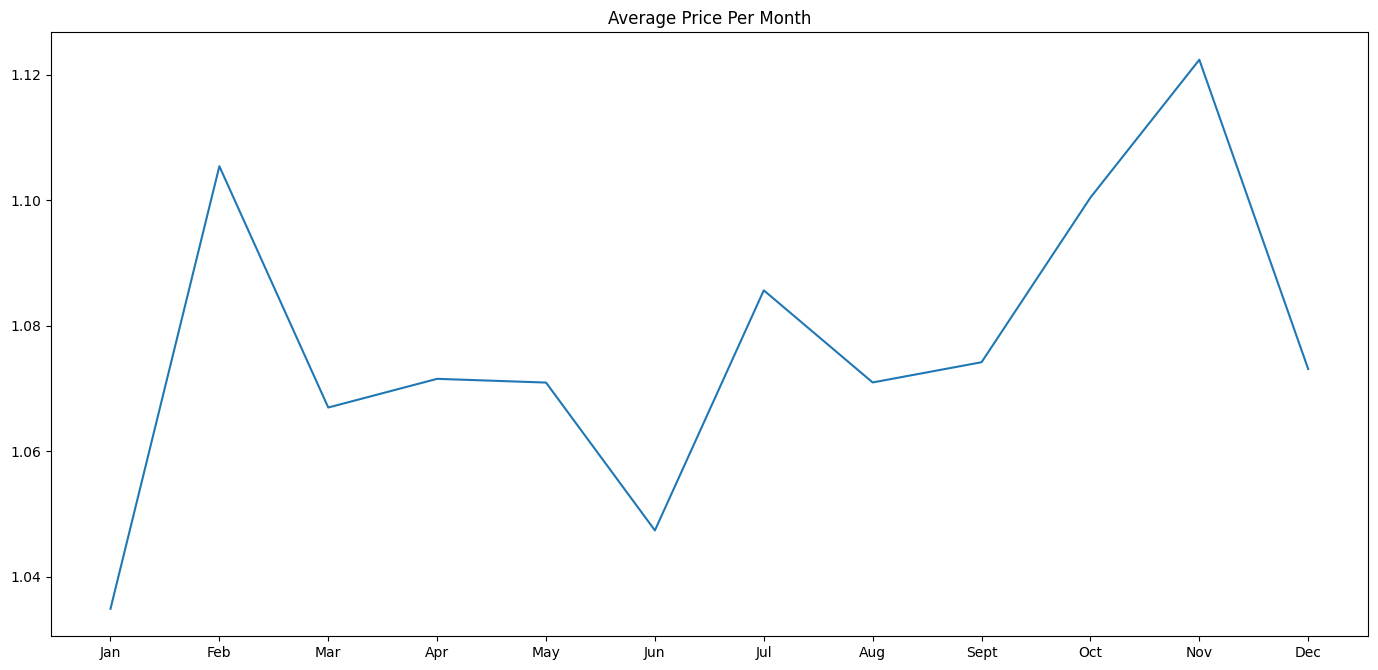

In [11]:
byMonth = df.groupby("Month").mean()
plt.figure(figsize=(17,8),dpi=100)
plt.plot(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"],byMonth['AveragePrice'])
plt.title('Average Price Per Month')

#### Higest price was observed during Sep to Nov Month.

Text(0.5, 1.0, 'Average Price Per Day')

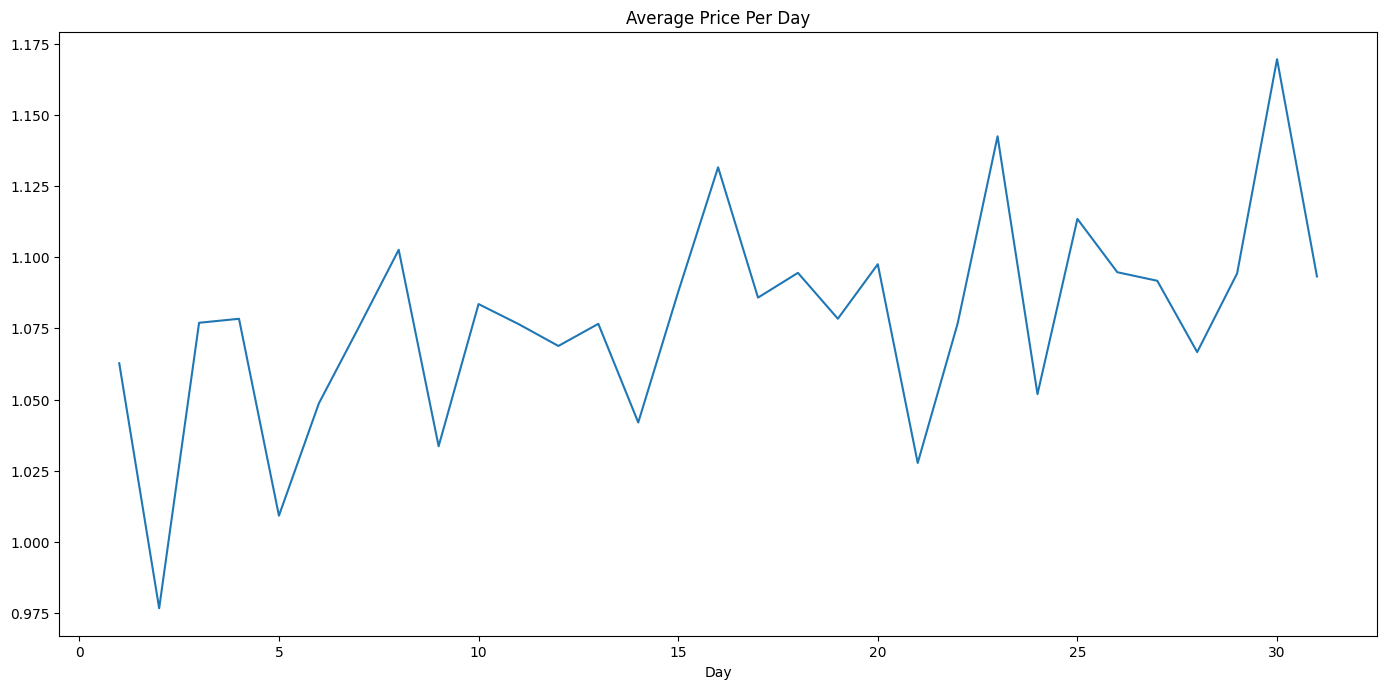

In [12]:
byDay = df.groupby("Day").mean()
plt.figure(figsize=(17,8),dpi=100)
byDay['AveragePrice'].plot()
plt.title('Average Price Per Day')

### The above graph for average price per day implies that the price fluctuates in a similar manner at a regular interval.



Text(0.5, 1.0, 'Average Price According to Region')

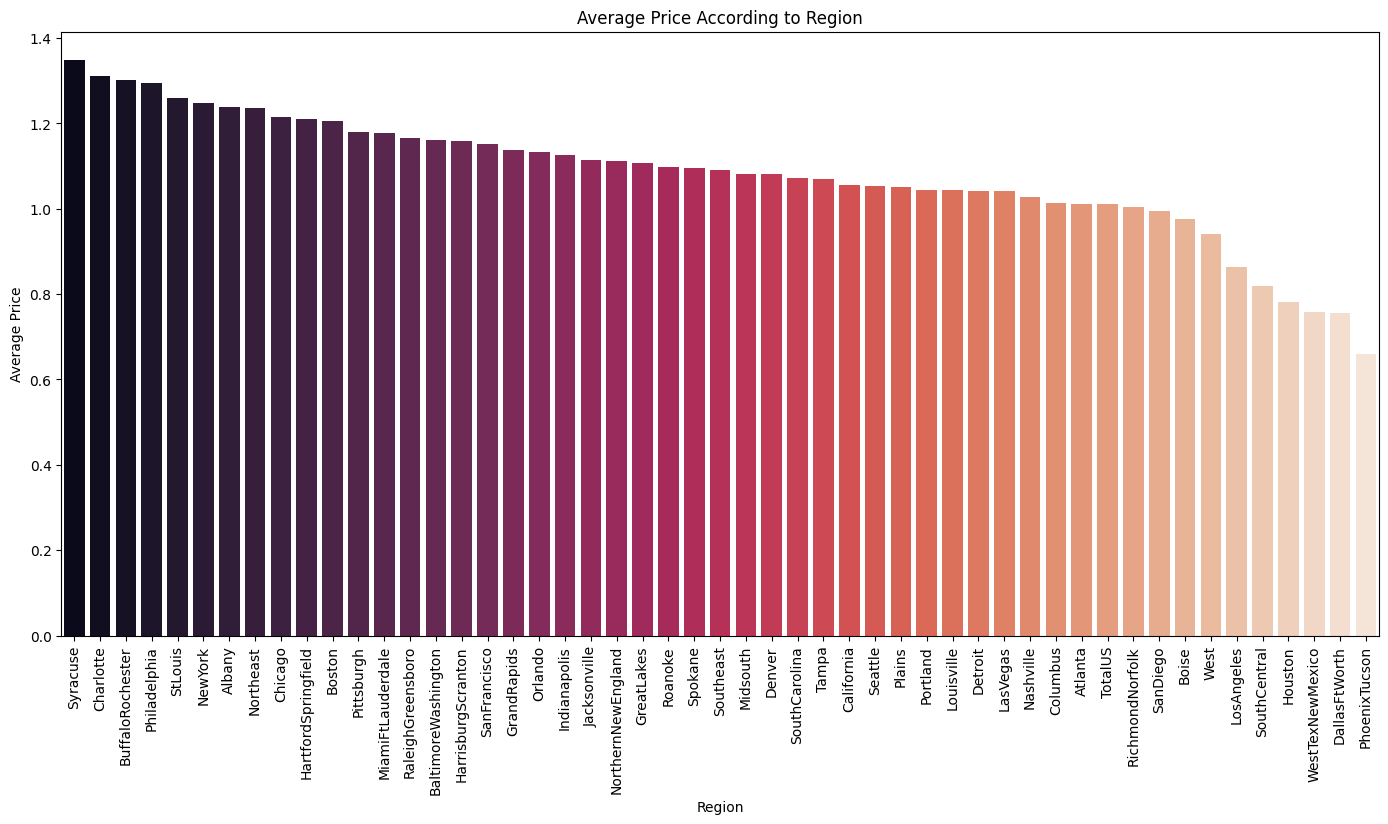

In [13]:
byRegion=df.groupby('region').mean()
byRegion.sort_values(by=['AveragePrice'], ascending=False, inplace=True)
plt.figure(figsize=(17,8),dpi=100)
sns.barplot(x = byRegion.index,y=byRegion["AveragePrice"],data = byRegion,palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price According to Region')

####  The barplot shows the average price of avocado at various regions in a ascending order. Clearly Hartford Springfield, SanFrancisco, NewYork are the regions with the highest avocado prices.

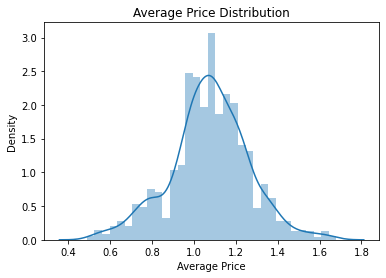

In [14]:
sns.distplot(df['AveragePrice'])
plt.xlabel("Average Price")
plt.title("Average Price Distribution")
plt.show()

### Obove graph shows that price distribution of avacado is equally distributted. it has very list right skewness,

<AxesSubplot:>

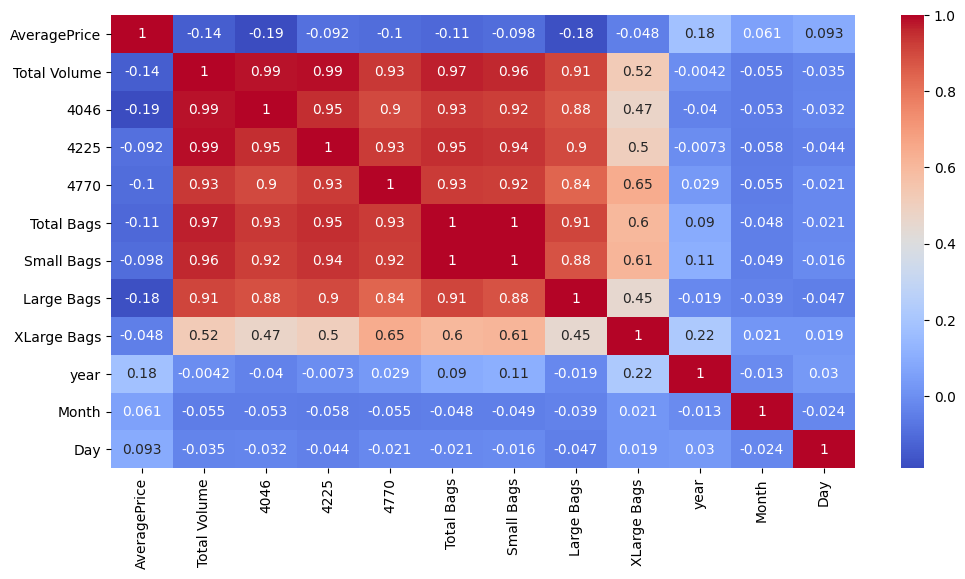

In [15]:
corr_df = df.corr(method='pearson')
plt.figure(figsize=(12,6),dpi=100)
sns.heatmap(corr_df,cmap='coolwarm',annot=True)

### As we can from the heatmap above, all the Features are not correlated with the Average Price column, instead most of them are correlated with each other.



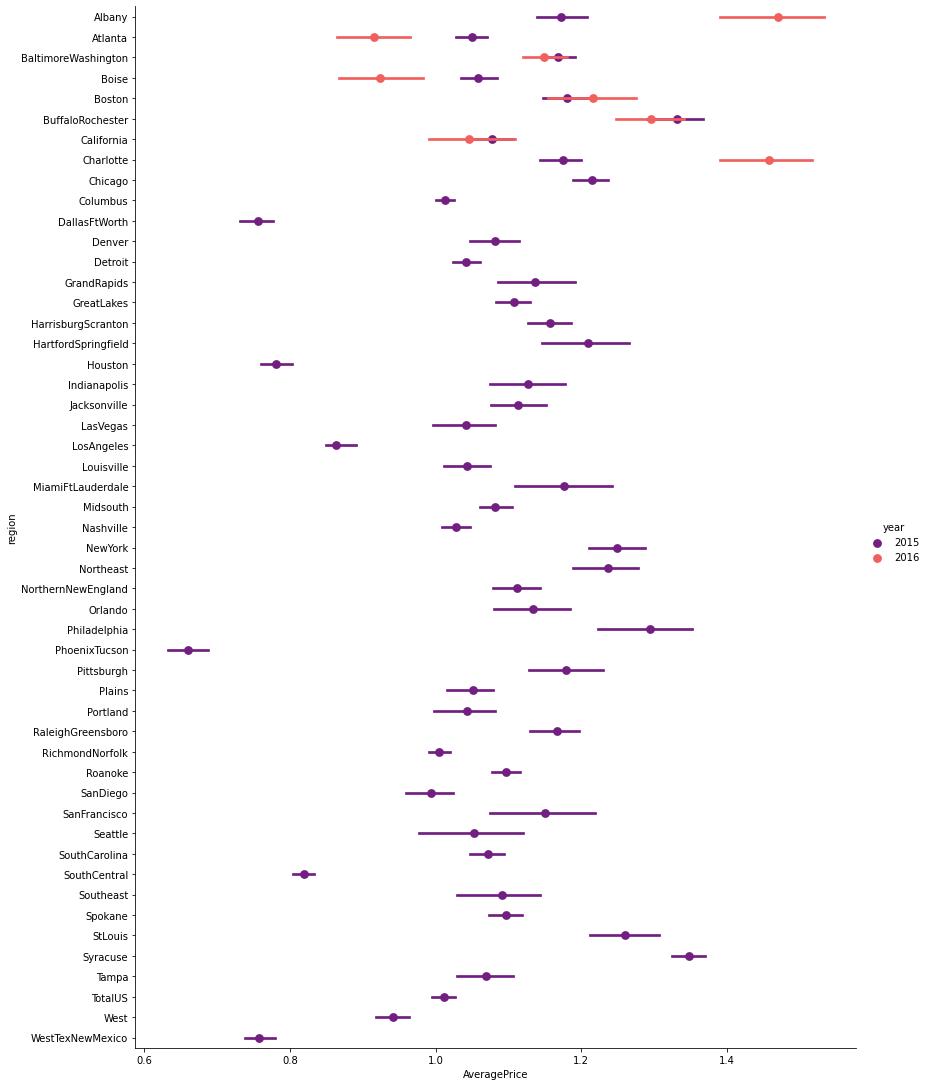

In [16]:
sns.factorplot('AveragePrice','region',data=df,
                   hue='year',
                   aspect=0.8,
                   height=15,
                   palette='magma',
                   join=False,
              )

# Observation:- 
1. In Above Fector plot , we can see that only some reason has price observation for both 2015 and 2016.
2. lowest price was observed in reason Phonix Tucson in 2015, 2016 data for this reagion is not available.
3. Some reagion has very small difference in price over the year.

In [17]:
# Deleting Date Variable

df.drop(columns=["Date"],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  1517 non-null   float64
 1   Total Volume  1517 non-null   float64
 2   4046          1517 non-null   float64
 3   4225          1517 non-null   float64
 4   4770          1517 non-null   float64
 5   Total Bags    1517 non-null   float64
 6   Small Bags    1517 non-null   float64
 7   Large Bags    1517 non-null   float64
 8   XLarge Bags   1517 non-null   float64
 9   type          1517 non-null   object 
 10  year          1517 non-null   int64  
 11  region        1517 non-null   object 
 12  Month         1517 non-null   int64  
 13  Day           1517 non-null   int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 166.0+ KB


## Check Outliers

<AxesSubplot:>

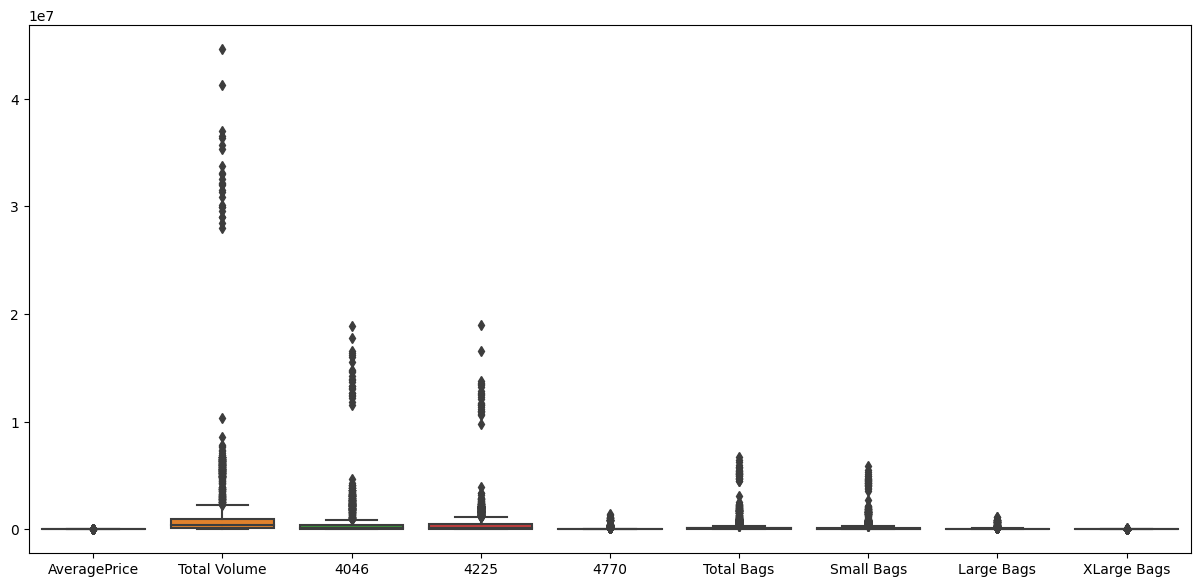

In [18]:

plt.figure(figsize=(15,7),dpi=100)
sns.boxplot(data = df[[
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']])

## W can see some variable has outlier, we can not delete data from dataset because it will cause the a specific region to out of consideration.
#### instead we will replace outlier which is higher then upper whisker with upper whisker and lower outlier with lower whisker.

In [19]:
from numpy import percentile
columns = df.columns
for j in columns:
    if isinstance(df[j][0], str) :
        continue
    else:
        for i in range(len(df)):
            #defining quartiles
            quartiles = percentile(df[j], [25,75])
            # calculate min/max
            lower_fence = quartiles[0] - (1.5*(quartiles[1]-quartiles[0]))
            upper_fence = quartiles[1] + (1.5*(quartiles[1]-quartiles[0]))
            if df[j][i] > upper_fence:
                df[j][i] = upper_fence
            elif df[j][i] < lower_fence:
                df[j][i] = lower_fence

### In the following code snippet we have we replaced the outliers higer than the upper whisker by the value of the upper whisker and the outliers lower than the lower whisker by the value of the lower whisker.



<AxesSubplot:>

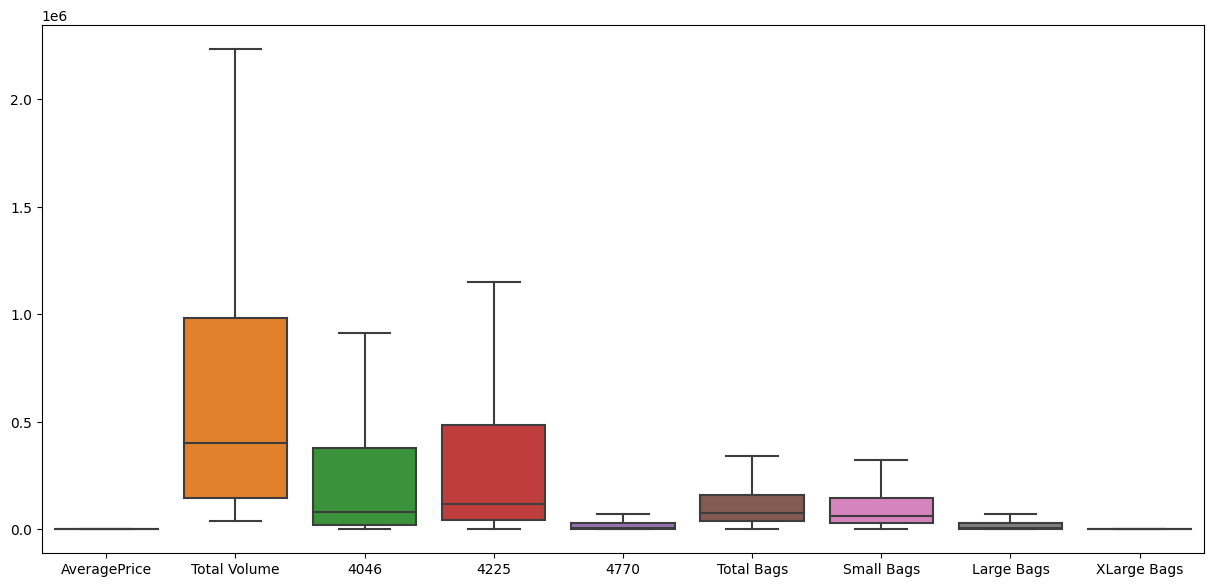

In [20]:
plt.figure(figsize=(15,7),dpi=100)
sns.boxplot(data = df[[
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']])

### Observation:-
Outlier removed for all feature in dataset.

## Handle Categorical Data

Encoding Region feature and drop the 

In [21]:
df['region'] = pd.Categorical(df['region'])
dfDummies_region = pd.get_dummies(df['region'], prefix = 'region')
df = pd.concat([df, dfDummies_region], axis=1)
df.drop(columns="region",inplace=True)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,...,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,...,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,...,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,...,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,...,0,0,0,0,0,0,0,0,0,0



##### Adding the one hot encoded columns for Month into our data and dropping the Month column from our dataset.



In [22]:
df['Month'] = pd.Categorical(df['Month'])
dfDummies_month = pd.get_dummies(df['Month'], prefix = 'month')
df = pd.concat([df, dfDummies_month], axis=1)
df.drop(columns="Month",inplace=True)


In [23]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,...,0,0,0,0,0,0,0,0,0,1
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,...,0,0,0,0,0,0,0,0,0,1
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,...,0,0,0,0,0,0,0,0,0,1
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,...,0,0,0,1,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,...,0,0,0,0,0,0,0,0,1,0


### Encoding Type featue using label encoder, because it has only two type, so it will be replace with 0 and 1.

In [24]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df['type']= label_encoder.fit_transform(df['type']) 
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1.330,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,...,0,0,0,0,0,0,0,0,0,1
1,1.350,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,...,0,0,0,0,0,0,0,0,0,1
2,0.930,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,...,0,0,0,0,0,0,0,0,0,1
3,1.080,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,...,0,0,0,1,0,0,0,0,0,0
4,1.280,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.390,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0,...,0,0,0,0,0,0,0,1,0,0
1513,1.505,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0,...,0,0,0,0,0,0,1,0,0,0
1514,1.480,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0,...,0,0,0,0,0,0,0,0,0,0
1515,1.470,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0,...,0,0,0,0,0,0,1,0,0,0


#### Check shape of Dataset

In [25]:
df.shape

(1517, 75)

#### We have 75 columns , one of them is our label or taget which is AveragePrice colum and rest of the columns are our independent value.

## Split Data in x and y

In [128]:
x=df.iloc[:,1:78]
y=df['AveragePrice']

In [129]:
x.shape

(1517, 74)

In [130]:
y.shape

(1517,)

### Normalizing x using standard scaler

In [131]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)


### Check for best random state

In [132]:
maxAccu = 0
maxRS = 0
for i in range(1,300):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = r2_score(y_test, LR.predict(x_test))
    if acc >maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is", maxAccu, "on Random_state",maxRS)

Best accuracy is 0.7574230323826724 on Random_state 172


#### Best Random state is 172, we will use it in train test split

## Train Test split.

In [133]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=172)
#y_test = np.array(y_test,dtype = float)


## Linear Regression

In [32]:
lm = LinearRegression()
lm.fit(x_train,y_train)
lm.score(x_train,y_train)
#predict the value
y_pred = lm.predict(x_test)
print("R2 Score", r2_score(y_test, y_pred))
print("Score ",lm.score(x_test,y_test) )
print('Mean absolute error', mean_absolute_error(y_test,y_pred))
print('Mean Squared error:', mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score 0.7489370269451622
Score  0.7489370269451622
Mean absolute error 0.06807065091066082
Mean Squared error: 0.008175894133808256
Root Mean Squared Error: 0.09042065103618893


### Cross Validation:-

In [33]:
scores = cross_val_score(lm, x_train, y_train,scoring='r2', cv=4 )
scores.mean()

0.6837603548867017

 ### Random Forest Regressor


In [34]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("R2 Score", r2_score(y_test, y_pred))
print("Score ",rf.score(x_test, y_test) )
print('Mean absolute error', mean_absolute_error(y_test,y_pred))
print('Mean Squared error:', mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score 0.8333515670098812
Score  0.8333515670098812
Mean absolute error 0.05374144736842105
Mean Squared error: 0.005426925082236838
Root Mean Squared Error: 0.07366766646390285


In [36]:
scores = cross_val_score(rf, x_train, y_train,scoring='r2', cv=4 )
scores.mean()

0.7533769765703264

### Lasso

In [37]:
from sklearn.linear_model import Lasso,Ridge
ls = Lasso(alpha=0.0001,normalize=True)    ## Alpha Value we get from best parameter tuning using Gridsearch CV, before this we use below comment alpha value 0.5
#ls=lasso(alpha=0.05) #default
ls.fit(x_train,y_train)
y_pred = ls.predict(x_test)
print("R2 Score", r2_score(y_test, y_pred))
print("Score ",ls.score(x_test,y_test) )
print('Mean absolute error', mean_absolute_error(y_test,y_pred))
print('Mean Squared error:', mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score 0.6954252464510706
Score  0.6954252464510706
Mean absolute error 0.07670701735902219
Mean Squared error: 0.00991851132226845
Root Mean Squared Error: 0.0995917231614578


# Cross Validation

In [38]:
scores = cross_val_score(ls, x_train, y_train, cv=4, scoring='r2')
scores.mean()

0.61926969722734

### Ridge Regression

In [39]:
#try to minimize the coeefocoent variance 
rd = Ridge(alpha=0.001, normalize=True)
#rd.Ridge()
rd.fit(x_train,y_train)
y_pred = rd.predict(x_test)
print("R2 Score", r2_score(y_test, y_pred))
print("Score ",rd.score(x_train,y_train) )
print('Mean absolute error', mean_absolute_error(y_test,y_pred))
print('Mean Squared error:', mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score 0.7504453180322537
Score  0.7230552021167715
Mean absolute error 0.06812840658193069
Mean Squared error: 0.008126776463842909
Root Mean Squared Error: 0.09014863539645461


In [40]:
scores = cross_val_score(rd, x_train, y_train, cv=4, scoring='r2')
scores.mean()

0.682744858836148

### Hyper Parameter Tuning

In [104]:
from sklearn.model_selection import GridSearchCV

#alphas = np.arange(0, 1, 0.01)model = RandomForestRegressor()
model = RandomForestRegressor()
parameters = {"n_estimators":[50,60,70,100], "criterion":["mse","mae"],
              "max_depth":[3,8,20],"min_samples_split":[2,3]
            ,"max_features":['auto'],"min_samples_leaf":[2,3] }

search = GridSearchCV(model, parameters, scoring='r2', cv=4, n_jobs=-1)
results = search.fit(x, y)

# summarize
print('R2: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

R2: 0.294
Config: {'criterion': 'mse', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


### Observation:-
Hyper parameter tuning require details parameter list to get correct or enhanced result, we have selected some parameter tuning on the basis of these parameter are suspecious. sometime defaule parameters give best result as compare to hyper tunned parameter because we are not defining all possible values in parameter list. 

however Hyper parameter tuning gave good result as compare to cross val score. hence we can use these paratmeter to predict value which will not having overfitting and under fitting problem.

i changed max depth n_estimator to get comparativly good results here.

In [115]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(criterion= 'mse', max_depth= 20, max_features= 'auto', min_samples_leaf= 2, min_samples_split= 2, n_estimators= 70)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("R2 Score", r2_score(y_test, y_pred))
print("Score ",rf.score(x_test, y_test) )
print('Mean absolute error', mean_absolute_error(y_test,y_pred))
print('Mean Squared error:', mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score 0.8418857727957236
Score  0.8418857727957236
Mean absolute error 0.05302030384127546
Mean Squared error: 0.005149007704886489
Root Mean Squared Error: 0.0717565864913214


# Saving Best Model

In [116]:
import joblib 
joblib.dump(rf,'avacado-price.pki')

['avacado-price.pki']

In [118]:
model = joblib.load('avacado-price.pki')

In [119]:
prediction = model.predict(x_test)

In [120]:
prediction = pd.DataFrame(prediction)

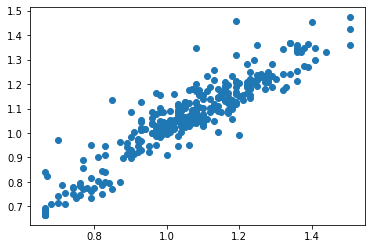

In [142]:
plt.scatter(y_test,prediction)
plt.show()

## We can see actual and predicted value following and linear relation.